# Incident Management Data Analysis

##  Background

### Incident Management

In ITIL (Information Technology Infrastructure Library) terminology, an ‘incident’ is defined as:<br/> 

An unplanned interruption to an IT service or reduction in the quality of an IT 
service. Failure of a configuration item that has not yet impacted service is also 
an incident, for example failure of one disk from a mirror set.<br/>

Incident Management is the process for dealing with all incidents; this can 
include failures, questions or queries reported by the users (usually via a 
telephone call to the Service Desk), by technical staff, or automatically detected 
and reported by event monitoring tools.

###  Purpose/goal/objective
The primary goal of the Incident Management process is to restore normal 
service operation as quickly as possible and minimize the adverse impact on 
business operations, thus ensuring that the best possible levels of service quality 
and availability are maintained. ‘Normal service operation’ is defined here as 
service operation within SLA limits.

### Value to business 

The value of Incident Management includes:<br/>
- The ability to detect and resolve incidents which results in lower downtime to the business, which in turn means higher availability of the service. This means that the business is able to exploit the functionality of the service as designed. 
- The ability to align IT activity to real-time business priorities. This is because Incident Management includes the capability to identify business priorities and dynamically allocate resources as necessary. 
- The ability to identify potential improvements to services. This happens as a result of understanding what constitutes an incident and also from being in contact with the activities of business operational staff. 
- The Service Desk can, during its handling of incidents, identify additional service or training requirements found in IT or the business.

Incident Management is highly visible to the business, and it is therefore easier to 
demonstrate its value than most areas in Service Operation. For this reason, 
Incident Management is often one of the first processes to be implemented in 
Service Management projects. The added benefit of doing this is that Incident 
Management can be used to highlight other areas that need attention – thereby 
providing a justification for expenditure on implementing other processes

### Metrics 
The metrics that should be monitored and reported upon to judge the efficiency
and effectiveness of the Incident Management process, and its operation, will 
include: 
- Total numbers of Incidents (as a control measure) 
- Breakdown of incidents at each stage (e.g. logged, work in progress, closed etc) 
- Size of current incident backlog 
- Number and percentage of major incidents 
- Mean elapsed time to achieve incident resolution or circumvention, broken down by impact code 
- Percentage of incidents handled within agreed response time (incident response-time targets may be specified in SLAs, for example, by impact and urgency codes) 
- Average cost per incident 
- Number of incidents reopened and as a percentage of the total 
- Number and percentage of incidents incorrectly assigned 
- Number and percentage of incidents incorrectly categorized 
- Percentage of Incidents closed by the Service Desk without reference to other levels of support (often referred to as ‘first point of contact’) 
- Number and percentage the of incidents processed per Service Desk agent 
- Number and percentage of incidents resolved remotely, without the need for a visit 
- Number of incidents handled by each Incident Model 
- Breakdown of incidents by time of day, to help pinpoint peaks and ensure matching of resources.

### Data Set Information:

This is an event log of an incident management process extracted from data gathered from the audit system of an instance of the ServiceNowTM platform used by an IT company. The event log is enriched with data loaded from a relational database underlying a corresponding process-aware information system. Information was anonymized for privacy.

### Attribute Information:

1. number: incident identifier (24,918 different values);
2. incident state: eight levels controlling the incident management process transitions from opening until closing the case;
3. active: boolean attribute that shows whether the record is active or closed/canceled;
4. reassignment_count: number of times the incident has the group or the support analysts changed;
5. reopen_count: number of times the incident resolution was rejected by the caller;
6. sys_mod_count: number of incident updates until that moment;
7. made_sla: boolean attribute that shows whether the incident exceeded the target SLA;
8. caller_id: identifier of the user affected;
9. opened_by: identifier of the user who reported the incident;
10. opened_at: incident user opening date and time;
11. sys_created_by: identifier of the user who registered the incident;
12. sys_created_at: incident system creation date and time;
13. sys_updated_by: identifier of the user who updated the incident and generated the current log record;
14. sys_updated_at: incident system update date and time;
15. contact_type: categorical attribute that shows by what means the incident was reported;
16. location: identifier of the location of the place affected;
17. category: first-level description of the affected service;
18. subcategory: second-level description of the affected service (related to the first level description, i.e., to category);
19. u_symptom: description of the user perception about service availability;
20. cmdb_ci: (confirmation item) identifier used to report the affected item (not mandatory);
21. impact: description of the impact caused by the incident (values: 1â€“High; 2â€“Medium; 3â€“Low);
22. urgency: description of the urgency informed by the user for the incident resolution (values: 1â€“High; 2â€“Medium; 3â€“Low);
23. priority: calculated by the system based on 'impact' and 'urgency';
24. assignment_group: identifier of the support group in charge of the incident;
25. assigned_to: identifier of the user in charge of the incident;
26. knowledge: boolean attribute that shows whether a knowledge base document was used to resolve the incident;
27. u_priority_confirmation: boolean attribute that shows whether the priority field has been double-checked;
28. notify: categorical attribute that shows whether notifications were generated for the incident;
29. problem_id: identifier of the problem associated with the incident;
30. rfc: (request for change) identifier of the change request associated with the incident;
31. vendor: identifier of the vendor in charge of the incident;
32. caused_by: identifier of the RFC responsible by the incident;
33. close_code: identifier of the resolution of the incident;
34. resolved_by: identifier of the user who resolved the incident;
35. resolved_at: incident user resolution date and time (dependent variable);
36. closed_at: incident user close date and time (dependent variable).

##### In this notebook, I will perform Data Analysis on Incident management process enriched event log Data Set by using some metrics explained

In [2]:
#Importing Packages

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
from datetime import timedelta
import seaborn as sns
import xgboost as xgb

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn import model_selection
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Load Data

In [3]:
#Import Dataset

df = pd.read_csv('incident_event_log.csv')
df

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141707,INC0120835,Closed,False,1,0,4,True,Caller 116,Opened by 12,16/2/2017 09:09,...,True,Do Not Notify,?,?,?,?,code 9,Resolved by 9,16/2/2017 09:53,16/2/2017 09:53
141708,INC0121064,Active,True,0,0,0,True,Caller 116,Opened by 12,16/2/2017 14:17,...,False,Do Not Notify,?,?,?,?,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38
141709,INC0121064,Active,True,1,0,1,True,Caller 116,Opened by 12,16/2/2017 14:17,...,False,Do Not Notify,?,?,?,?,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38
141710,INC0121064,Resolved,True,1,0,2,True,Caller 116,Opened by 12,16/2/2017 14:17,...,True,Do Not Notify,?,?,?,?,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38


### Dataframe Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   number                   141712 non-null  object
 1   incident_state           141712 non-null  object
 2   active                   141712 non-null  bool  
 3   reassignment_count       141712 non-null  int64 
 4   reopen_count             141712 non-null  int64 
 5   sys_mod_count            141712 non-null  int64 
 6   made_sla                 141712 non-null  bool  
 7   caller_id                141712 non-null  object
 8   opened_by                141712 non-null  object
 9   opened_at                141712 non-null  object
 10  sys_created_by           141712 non-null  object
 11  sys_created_at           141712 non-null  object
 12  sys_updated_by           141712 non-null  object
 13  sys_updated_at           141712 non-null  object
 14  contact_type        

### Basic data cleaning

In [5]:
# number of missing values per column
df.isna().sum()

number                     0
incident_state             0
active                     0
reassignment_count         0
reopen_count               0
sys_mod_count              0
made_sla                   0
caller_id                  0
opened_by                  0
opened_at                  0
sys_created_by             0
sys_created_at             0
sys_updated_by             0
sys_updated_at             0
contact_type               0
location                   0
category                   0
subcategory                0
u_symptom                  0
cmdb_ci                    0
impact                     0
urgency                    0
priority                   0
assignment_group           0
assigned_to                0
knowledge                  0
u_priority_confirmation    0
notify                     0
problem_id                 0
rfc                        0
vendor                     0
caused_by                  0
closed_code                0
resolved_by                0
resolved_at   

In [6]:
# number of duplicated data
df.duplicated().sum()

0

### Numerical Data

In [7]:
numerics = ['int8','int16', 'int32', 'int64', 'float16', 'float32', 'float64']
display(df.select_dtypes(include=numerics).columns)
print(df.select_dtypes(include=numerics).shape)
df_num = df.select_dtypes(include=numerics)
df_num.head(5)

Index(['reassignment_count', 'reopen_count', 'sys_mod_count'], dtype='object')

(141712, 3)


,reassignment_count,reopen_count,sys_mod_count
0,0,0,0
1,0,0,2
2,0,0,3
3,0,0,4
4,0,0,0


### Non Numerical Data

In [8]:
display(df.select_dtypes(include=['object']).columns)
print(df.select_dtypes(include=object).shape)
df_cat = df.select_dtypes(include=['object'])
df_cat.head(5)

Index(['number', 'incident_state', 'caller_id', 'opened_by', 'opened_at',
       'sys_created_by', 'sys_created_at', 'sys_updated_by', 'sys_updated_at',
       'contact_type', 'location', 'category', 'subcategory', 'u_symptom',
       'cmdb_ci', 'impact', 'urgency', 'priority', 'assignment_group',
       'assigned_to', 'notify', 'problem_id', 'rfc', 'vendor', 'caused_by',
       'closed_code', 'resolved_by', 'resolved_at', 'closed_at'],
      dtype='object')

(141712, 29)


,number,incident_state,caller_id,opened_by,opened_at,sys_created_by,sys_created_at,sys_updated_by,sys_updated_at,contact_type,...,assigned_to,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 21,29/2/2016 01:23,Phone,...,?,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 642,29/2/2016 08:53,Phone,...,?,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 804,29/2/2016 11:29,Phone,...,?,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 908,5/3/2016 12:00,Phone,...,?,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,29/2/2016 04:57,Updated by 746,29/2/2016 04:57,Phone,...,Resolver 89,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


In [9]:
# inspect the number of unique values for each categorical columns

for feature in df_cat:
  print(f'Distinct values of column {feature} are:')
  print(df[feature].value_counts(normalize=True)*100)
  print("----------------------------------\n")

Distinct values of column number are:
INC0019396    0.040928
INC0044260    0.039517
INC0005927    0.032460
INC0020718    0.031755
INC0011206    0.031049
                ...   
INC0013493    0.001411
INC0030079    0.001411
INC0013496    0.001411
INC0005402    0.001411
INC0011991    0.001411
Name: number, Length: 24918, dtype: float64
----------------------------------

Distinct values of column incident_state are:
Active                27.320199
New                   25.690838
Resolved              18.171362
Closed                17.630829
Awaiting User Info    10.332223
Awaiting Vendor        0.498899
Awaiting Problem       0.325308
Awaiting Evidence      0.026815
-100                   0.003528
Name: incident_state, dtype: float64
----------------------------------

Distinct values of column caller_id are:
Caller 1904    1.005561
Caller 290     0.558174
Caller 4514    0.505250
Caller 1441    0.227221
Caller 298     0.206757
                 ...   
Caller 3545    0.001411
Caller 2913  

3 - Moderate    93.465620
4 - Low          2.843796
2 - High         2.097211
1 - Critical     1.593372
Name: priority, dtype: float64
----------------------------------

Distinct values of column assignment_group are:
Group 70    30.677713
?           10.029496
Group 25     5.418737
Group 24     4.764593
Group 20     4.353901
              ...    
Group 41     0.002117
Group 38     0.001411
Group 11     0.000706
Group 4      0.000706
Group 16     0.000706
Name: assignment_group, Length: 79, dtype: float64
----------------------------------

Distinct values of column assigned_to are:
?               19.402732
Resolver 17      7.472903
Resolver 13      6.211189
Resolver 194     2.480383
Resolver 57      2.218584
                  ...    
Resolver 131     0.000706
Resolver 146     0.000706
Resolver 67      0.000706
Resolver 129     0.000706
Resolver 199     0.000706
Name: assigned_to, Length: 235, dtype: float64
----------------------------------

Distinct values of column notify are:
Do

### Exploratory Data Analysis & Feature Engineering

In [10]:
df_tc = df["incident_state"] == "Closed"
df_tc = df[df_tc]
df_tc = df_tc.drop_duplicates(subset=['number'])

In [11]:
#change data type
df_tc['opened_at'] = pd.to_datetime(df['opened_at'])
df_tc['sys_updated_at'] = pd.to_datetime(df['sys_updated_at'])
df_tc['closed_at'] = pd.to_datetime(df['closed_at'])

#### The total number of problems recorded in the period (as a control measure) 

In [12]:
df_tc['closed_at_y'] = df_tc['closed_at'].dt.year
df_period = df_tc.groupby(['closed_at_y']).agg( {'number' : ['count']} )
df_period

,number
,count
closed_at_y,
2016,24729
2017,189


<AxesSubplot:xlabel='closed_at_y'>

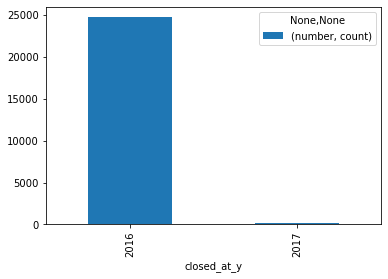

In [13]:
df_period.plot.bar()

Ticket numbers significantly decrease in 2017

#### Breakdown of incidents at each stage

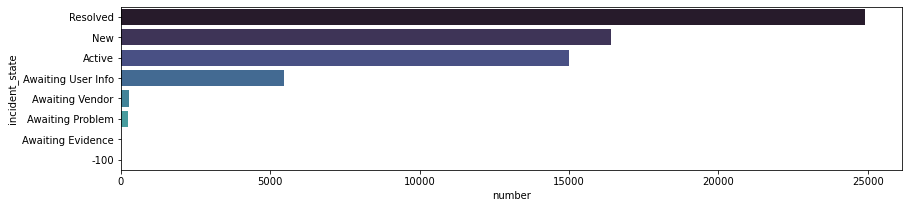

In [14]:
df_incident_state = df.groupby(["incident_state"])["number"].nunique().sort_values(ascending=False).reset_index()
plt.figure(figsize=(14,3))
df_incident_state.drop([0],inplace=True)
sns.barplot(data=df_incident_state, x="number", y="incident_state", palette = "mako");
plt.show()

In [15]:
df_incident_state

,incident_state,number
1,Resolved,24905
2,New,16397
3,Active,15013
4,Awaiting User Info,5471
5,Awaiting Vendor,259
6,Awaiting Problem,247
7,Awaiting Evidence,21
8,-100,2


From total 24918 ticket number, 24905 tickets resolved

#### Size of Daily Incident Backlog

In [16]:
df_backlog = df["incident_state"] != "Closed"
df_backlog = df[df_backlog]
df_backlog['opened_at'] = pd.to_datetime(df['opened_at']).dt.date

In [17]:
df_lineplot_backlog = df_backlog.groupby(['opened_at']).count().reset_index()

<AxesSubplot:xlabel='opened_at', ylabel='number'>

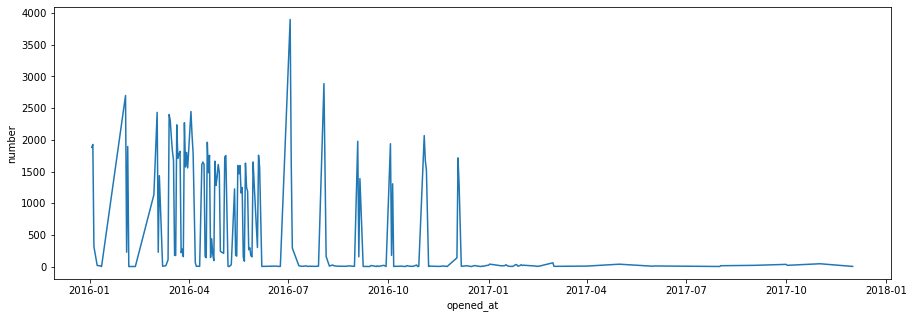

In [18]:
fig = plt.figure(figsize=(15,5))
sns.lineplot(x='opened_at', y='number', data=df_lineplot_backlog)

The result shown more stable and less ticket backlog in 2017

In [19]:
df_tc['range_time'] = df_tc['closed_at'] - df_tc['opened_at']
df_tc['range_time_minutes'] = df_tc['range_time'] / np.timedelta64(1, 'm')
df_tc[["opened_at", "closed_at", 'range_time_minutes']].head()

,opened_at,closed_at,range_time_minutes
3,2016-02-29 01:16:00,2016-05-03 12:00:00,92804.0
12,2016-02-29 04:40:00,2016-06-03 10:00:00,137120.0
19,2016-02-29 06:10:00,2016-06-03 03:00:00,136610.0
23,2016-02-29 06:38:00,2016-07-03 13:00:00,180382.0
31,2016-02-29 06:58:00,2016-05-03 16:00:00,92702.0


#### Distribution of range time

<AxesSubplot:ylabel='range_time_minutes'>

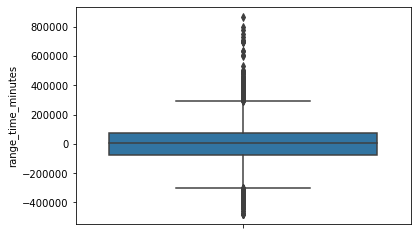

In [20]:
sns.boxplot(y=df_tc['range_time_minutes'])

#### Mean elapsed time to achieve incident resolution or circumvention, broken down by impact code

In [21]:
df_met = df_tc.groupby(['impact']).agg( {'range_time_minutes' : ['mean','count']} )
df_met

range_time_minutes       
                         mean  count
impact                              
1 - High         14438.793349    421
2 - Medium        7386.718268  23746
3 - Low          27000.625832    751

<AxesSubplot:xlabel='impact'>

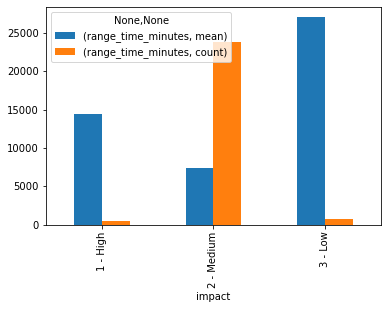

In [22]:
df_met.plot.bar()

'Medium' impact has the lowest mean elapsed time, although it has the most ticket number

#### Number of incidents reopened and as a percentage of the total

In [23]:
df_tc["reopen"] = np.where(df_tc. reopen_count>=1, 
   "reopen", 
   "no"
)
df_reopen = df_tc.groupby(["reopen"])["number"].count().reset_index()

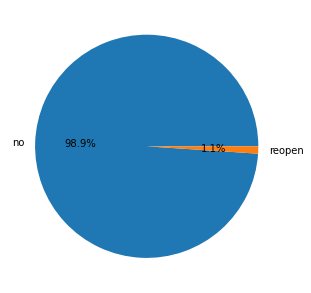

In [24]:
fig = plt.figure(figsize =(5, 10))

# Matplotlib
reopen = df_reopen["reopen"].tolist()
number = df_reopen["number"].tolist()

# Pie Chart
plt.pie(number, 
        labels = reopen, 
        autopct='%.1f%%')

# Show Plot
plt.show()

Only 1.1% ticket reopen

#### Number and percentage of incidents incorrectly assigned

In [25]:
df_tc["reassign"] = np.where(df_tc. reassignment_count>=1, 
   "reassign", 
   "no"
)

df_reassign = df_tc.groupby(["reassign"])["number"].count().reset_index()

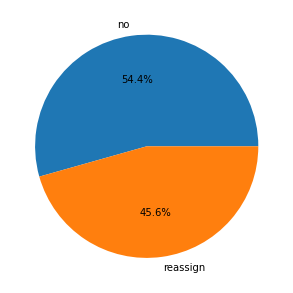

In [26]:
fig = plt.figure(figsize =(5, 10))

# Matplotlib
reassign = df_reassign["reassign"].tolist()
number = df_reassign["number"].tolist()

# Pie Chart
plt.pie(number, 
        labels = reassign, 
        autopct='%.1f%%')

# Show Plot
plt.show()

The result shown 45.6% ticket reassign

### What features are important to predict incidents handled within agreed response time?

#### Percentage of incidents handled within agreed response time

In [27]:
df_made_sla = df_tc.groupby(["made_sla"])["number"].count().reset_index()

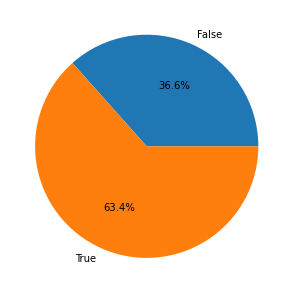

In [28]:
fig = plt.figure(figsize =(5, 10))

# Matplotlib
made_sla = df_made_sla["made_sla"].tolist()
number = df_made_sla["number"].tolist()

# Pie Chart
plt.pie(number, 
        labels = made_sla, 
        autopct='%.1f%%')

# Show Plot
plt.show() 

36.6% ticket not made SLA

#### Correlation heatmap analysis

<AxesSubplot:>

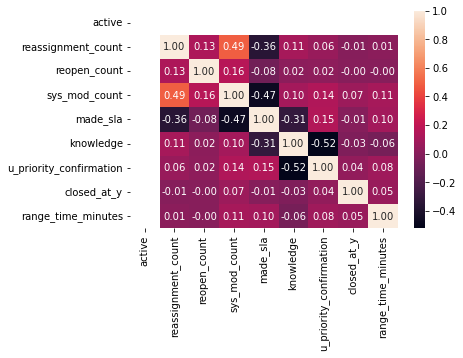

In [29]:
# to handle multicollineary (if any)

correlation = df_tc.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

There's no multicollineary

## Data Preparation 

### Transform categorical variables

#### Ordinal Encoding

In [30]:
map_priority = {"4 - Low":1,
               "3 - Moderate":2,
               "2 - High":3,
               "1 - Critical":4}
df_tc["priority_cat"] = df_tc["priority"].map(map_priority)
priority_or = df_tc[["priority","priority_cat"]]
priority_or

,priority,priority_cat
3,3 - Moderate,2
12,3 - Moderate,2
19,3 - Moderate,2
23,3 - Moderate,2
31,2 - High,3
...,...,...
141695,3 - Moderate,2
141697,4 - Low,1
141703,3 - Moderate,2
141707,3 - Moderate,2


In [31]:
map_urgency = {"3 - Low":1,
               "2 - Medium":2,
               "1 - High":3,}
df_tc["urgency_cat"] = df_tc["urgency"].map(map_urgency)
urgency_or = df_tc[["urgency","urgency_cat"]]
urgency_or

,urgency,urgency_cat
3,2 - Medium,2
12,2 - Medium,2
19,2 - Medium,2
23,2 - Medium,2
31,2 - Medium,2
...,...,...
141695,2 - Medium,2
141697,2 - Medium,2
141703,2 - Medium,2
141707,2 - Medium,2


In [32]:
map_impact = {"3 - Low":1,
              "2 - Medium":2,
              "1 - High":3,}
df_tc["impact_cat"] = df_tc["impact"].map(map_impact)
impact_or = df_tc[["impact","impact_cat"]]
impact_or

,impact,impact_cat
3,2 - Medium,2
12,2 - Medium,2
19,2 - Medium,2
23,2 - Medium,2
31,1 - High,3
...,...,...
141695,2 - Medium,2
141697,3 - Low,1
141703,2 - Medium,2
141707,2 - Medium,2


#### Change data type

In [33]:
df_tc['range_time_minutes'] = df_tc['range_time_minutes'].astype(int)

In [34]:
# decomposing 

df_tc['opened_at_n'] = df_tc['opened_at'].dt.day_of_week
df_tc['closed_at_n'] = df_tc['closed_at'].dt.day_of_week
df_tc

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,closed_at_y,range_time,range_time_minutes,reopen,reassign,priority_cat,urgency_cat,impact_cat,opened_at_n,closed_at_n
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,...,2016,64 days 10:44:00,92804,no,no,2,2,2,0,1
12,INC0000047,Closed,False,1,0,8,True,Caller 2403,Opened by 397,2016-02-29 04:40:00,...,2016,95 days 05:20:00,137120,no,reassign,2,2,2,0,4
19,INC0000057,Closed,False,0,0,6,True,Caller 4416,Opened by 8,2016-02-29 06:10:00,...,2016,94 days 20:50:00,136610,no,no,2,2,2,0,4
23,INC0000060,Closed,False,0,0,3,True,Caller 4491,Opened by 180,2016-02-29 06:38:00,...,2016,125 days 06:22:00,180382,no,no,2,2,2,0,6
31,INC0000062,Closed,False,1,0,7,False,Caller 3765,Opened by 180,2016-02-29 06:58:00,...,2016,64 days 09:02:00,92702,no,reassign,3,2,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141695,INC0120304,Closed,False,0,0,2,True,Caller 90,Opened by 8,2017-02-15 02:02:00,...,2017,1 days 22:48:00,2808,no,no,2,2,2,2,4
141697,INC0120319,Closed,False,0,0,1,True,Caller 1899,Opened by 508,2017-02-15 07:09:00,...,2017,0 days 00:00:00,0,no,no,1,2,1,2,2
141703,INC0120495,Closed,False,1,0,5,True,Caller 323,Opened by 14,2017-02-15 11:58:00,...,2017,0 days 21:53:00,1313,no,reassign,2,2,2,2,3
141707,INC0120835,Closed,False,1,0,4,True,Caller 116,Opened by 12,2017-02-16 09:09:00,...,2017,0 days 00:44:00,44,no,reassign,2,2,2,3,3


### Remove features

- Features that only have 1 unique value (incident_state, active)
- ID (number)
- Features that would not be used or its function redundant and already cover by another feature(sys_created_at, resolved_at, sys_created_b, cmdb_ci, opened_at, sys_updated_at, closed_at,closed_at_y, impact, urgency, priority, sys_updated_by, range_time, reopen, reassign)
- Feature that contain '?' more than 90% (problem_id, rfc, vendor, caused_by, cmdb_ci)

In [35]:
df_tc = df_tc.drop(['number', 'incident_state', 'active', 'sys_created_at', 'problem_id', 'rfc', 'vendor', 'caused_by', 
                    'resolved_at', 'sys_created_by','cmdb_ci', 'opened_at', 'sys_updated_at', 'closed_at', "impact",
                    "urgency","priority","sys_updated_by","range_time", "reopen","reassign", 'closed_at_y'], axis = 1)

In [36]:
df_tc

,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,contact_type,location,category,subcategory,...,u_priority_confirmation,notify,closed_code,resolved_by,range_time_minutes,priority_cat,urgency_cat,impact_cat,opened_at_n,closed_at_n
3,0,0,4,True,Caller 2403,Opened by 8,Phone,Location 143,Category 55,Subcategory 170,...,False,Do Not Notify,code 5,Resolved by 149,92804,2,2,2,0,1
12,1,0,8,True,Caller 2403,Opened by 397,Phone,Location 165,Category 40,Subcategory 215,...,False,Do Not Notify,code 5,Resolved by 81,137120,2,2,2,0,4
19,0,0,6,True,Caller 4416,Opened by 8,Phone,Location 204,Category 20,Subcategory 125,...,False,Do Not Notify,code 10,Resolved by 5,136610,2,2,2,0,4
23,0,0,3,True,Caller 4491,Opened by 180,Phone,Location 204,Category 9,Subcategory 97,...,False,Do Not Notify,code 3,Resolved by 113,180382,2,2,2,0,6
31,1,0,7,False,Caller 3765,Opened by 180,Phone,Location 93,Category 53,Subcategory 168,...,False,Do Not Notify,code 7,Resolved by 62,92702,3,2,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141695,0,0,2,True,Caller 90,Opened by 8,Email,Location 188,Category 52,Subcategory 177,...,True,Do Not Notify,code 6,Resolved by 5,2808,2,2,2,2,4
141697,0,0,1,True,Caller 1899,Opened by 508,IVR,Location 246,Category 50,Subcategory 10,...,False,Do Not Notify,code 6,?,0,1,2,1,2,2
141703,1,0,5,True,Caller 323,Opened by 14,Phone,Location 135,Category 59,Subcategory 210,...,False,Do Not Notify,?,?,1313,2,2,2,2,3
141707,1,0,4,True,Caller 116,Opened by 12,Email,Location 204,Category 42,Subcategory 223,...,True,Do Not Notify,code 9,Resolved by 9,44,2,2,2,3,3


#### Label Encoding

In [37]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [38]:
df_tc = MultiColumnLabelEncoder(columns = ["made_sla", "contact_type", "knowledge", "u_priority_confirmation", "notify"]).fit_transform(df_tc)

#### One-Hot Encoding

In [39]:
onehot_columns = ["resolved_by","caller_id", "opened_by","contact_type","location","category",
                  "subcategory", "u_symptom","assignment_group","assigned_to","closed_code",
                  "opened_at_n","closed_at_n"]
df_tc = pd.get_dummies(df_tc, columns = onehot_columns)

In [40]:
df_tc

,reassignment_count,reopen_count,sys_mod_count,made_sla,knowledge,u_priority_confirmation,notify,range_time_minutes,priority_cat,urgency_cat,...,opened_at_n_4,opened_at_n_5,opened_at_n_6,closed_at_n_0,closed_at_n_1,closed_at_n_2,closed_at_n_3,closed_at_n_4,closed_at_n_5,closed_at_n_6
3,0,0,4,1,1,0,0,92804,2,2,...,0,0,0,0,1,0,0,0,0,0
12,1,0,8,1,1,0,0,137120,2,2,...,0,0,0,0,0,0,0,1,0,0
19,0,0,6,1,1,0,0,136610,2,2,...,0,0,0,0,0,0,0,1,0,0
23,0,0,3,1,1,0,0,180382,2,2,...,0,0,0,0,0,0,0,0,0,1
31,1,0,7,0,1,0,0,92702,3,2,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141695,0,0,2,1,0,1,0,2808,2,2,...,0,0,0,0,0,0,0,1,0,0
141697,0,0,1,1,0,0,0,0,1,2,...,0,0,0,0,0,1,0,0,0,0
141703,1,0,5,1,0,0,0,1313,2,2,...,0,0,0,0,0,0,1,0,0,0
141707,1,0,4,1,0,1,0,44,2,2,...,0,0,0,0,0,0,1,0,0,0


In [41]:
df_tc['made_sla'].value_counts(normalize=True)*100

1    63.420018
0    36.579982
Name: made_sla, dtype: float64

Data is not balance

#### Balanced Data

In [42]:
# separating the independent and dependent variables
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)
y = df_tc['made_sla']
X = df_tc.drop(labels = ['made_sla'], axis = 1)
X_sm, y_sm = sm.fit_resample(X, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (24918, 6932)
Shape of X after SMOTE: (31606, 6932)

Balance of positive and negative classes (%):


1    50.0
0    50.0
Name: made_sla, dtype: float64

#### Split Dataset

In [43]:
from sklearn.model_selection import train_test_split 
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

#### Decision tree modeling to compare with baseline

In [44]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
%time dt.fit(X_train,y_train)

CPU times: user 6.06 s, sys: 426 ms, total: 6.49 s
Wall time: 6.71 s


DecisionTreeClassifier(random_state=42)

#### Predict

In [45]:
y_pred_dt = dt.predict(X_test)
y_pred_dt

array([0, 1, 1, ..., 1, 1, 1])

#### Metric Evaluation

In [46]:
print('Accuracy',accuracy_score(y_test, y_pred_dt))

Accuracy 0.9519796682718031


It has better accuration than baseline (0.8966024612092027)

#### Evaluate other modeling method

In [47]:
def rmse(targets,predictions):

    differences = predictions - targets                       #the DIFFERENCEs.

    differences_squared = differences ** 2                    #the SQUAREs of ^

    mean_of_differences_squared = differences_squared.mean()  #the MEAN of ^

    rmse_val = np.sqrt(mean_of_differences_squared)           #ROOT of ^

    return rmse_val 

In [48]:
regressors = [LinearRegression(),
              Lasso(),
              Ridge(),
              ElasticNet(),
              RandomForestRegressor(n_estimators = 10, random_state=1),
              xgb.XGBRegressor(random_state=42)]

df_tc = pd.DataFrame(columns = ['Method', 'MAE', 'RMSE', 'R2 Score'])

In [49]:
for regressor in regressors:
    %time regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)

    method = str(type(regressor)).split('.')[-1][:-2]

    # MAE score
    mae = mean_absolute_error(y_test, y_pred)

    #RMSE Score
    rmse_value = rmse(y_test, y_pred)

    #R2 Score
    r2 = r2_score(y_test, y_pred)

    df_tc = df_tc.append({'Method': method, 
                          'MAE': mae, 
                          'RMSE': rmse_value,
                          'R2 Score': r2},
                        ignore_index=True)

CPU times: user 7min 41s, sys: 27.1 s, total: 8min 8s
Wall time: 1min 8s
CPU times: user 5.08 s, sys: 2.41 s, total: 7.49 s
Wall time: 2.98 s
CPU times: user 1min 36s, sys: 3.11 s, total: 1min 39s
Wall time: 14.6 s
CPU times: user 3.02 s, sys: 1.61 s, total: 4.64 s
Wall time: 2.26 s
CPU times: user 27.9 s, sys: 532 ms, total: 28.4 s
Wall time: 27.3 s
CPU times: user 16min 14s, sys: 42.8 s, total: 16min 57s
Wall time: 2min 23s


In [50]:
df_tc

,Method,MAE,RMSE,R2 Score
0,LinearRegression,0.301395,0.396511,0.327398
1,Lasso,0.408038,0.435377,0.189079
2,Ridge,0.274934,0.357140,0.454337
3,ElasticNet,0.389344,0.425065,0.227037
4,RandomForestRegressor,0.062520,0.193162,0.840379
5,XGBRegressor,0.074503,0.152394,0.900646


Result shown that RandomForestRegressor and XGBRegressor has better score than other method

#### Tuning Hyperparameters

In [51]:
param_grid = [
{'n_estimators': [10, 25], 'max_features': [5, 10], 
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

rf = RandomForestRegressor()

grid_search_forest = GridSearchCV(rf, param_grid, cv=10, scoring='neg_mean_squared_error')
%time grid_search_forest.fit(X_train, y_train)

CPU times: user 8min 3s, sys: 1min 15s, total: 9min 18s
Wall time: 9min 34s


GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid=[{'bootstrap': [True, False],
                          'max_depth': [10, 50, None], 'max_features': [5, 10],
                          'n_estimators': [10, 25]}],
             scoring='neg_mean_squared_error')

In [52]:
cv_result = pd.DataFrame(grid_search_forest.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
23,"{'bootstrap': False, 'max_depth': None, 'max_f...",-0.092248,1
21,"{'bootstrap': False, 'max_depth': None, 'max_f...",-0.095724,2
11,"{'bootstrap': True, 'max_depth': None, 'max_fe...",-0.098202,3
22,"{'bootstrap': False, 'max_depth': None, 'max_f...",-0.101856,4
9,"{'bootstrap': True, 'max_depth': None, 'max_fe...",-0.103457,5
20,"{'bootstrap': False, 'max_depth': None, 'max_f...",-0.106946,6
10,"{'bootstrap': True, 'max_depth': None, 'max_fe...",-0.107400,7
8,"{'bootstrap': True, 'max_depth': None, 'max_fe...",-0.112091,8
19,"{'bootstrap': False, 'max_depth': 50, 'max_fea...",-0.174168,9
7,"{'bootstrap': True, 'max_depth': 50, 'max_feat...",-0.175209,10


In [53]:
grid_search_forest.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=10, n_estimators=25)

#### Feature importance

In [54]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(bootstrap=False, max_features=10, n_estimators=25)
model.fit(X,y)

RandomForestClassifier(bootstrap=False, max_features=10, n_estimators=25)

<AxesSubplot:>

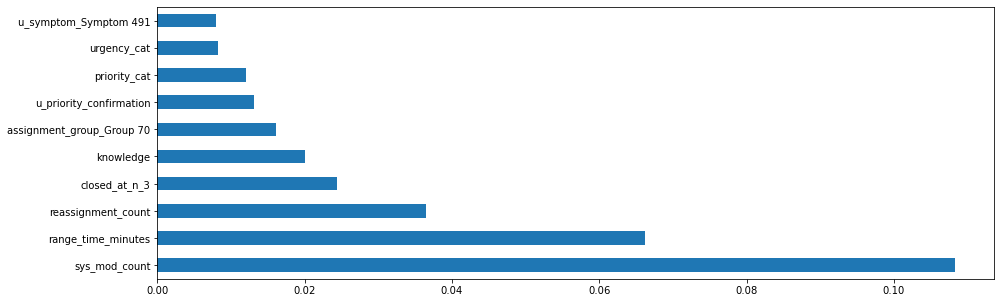

In [55]:
fig, ax = plt.subplots(1,1, figsize=(15,5))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')

10 features above are the most important feature to predict incidents handled within agreed response time

### Insight

- Ticket numbers significantly decrease in 2017 compare than 2016 and the result also shown more stable and less ticket backlog in 2017, it means company does massive improvement that affecting the amount of reporting ticket

- From total 24918 ticket number, 24905 tickets resolved, that's a sign that the company can handle 99,9% well

- 'Medium' impact has the lowest mean elapsed time, although it has the most ticket number, so companies can focus to find out what causes 'High' and 'Low' impact has higher elapsed time

- Only 1.1% ticket reopen, it is shown that the ticketing agent understand enough when they can close the ticket

- The result shown 45.6% ticket reassign, it could impacting mean elapsed time, companies have to find out what causes this problem (e.g. SOP that not clear enough, agent understanding related this case)

- 36.6% ticket not made SLA, it's a huge amount, 10 most important feature predict incidents handled within agreed response time can help companies to improve ticket that made SLA


### Source
Data Set: Incident management process enriched event log Data Set by UCI Machine Learning Library.<br/>
https://archive.ics.uci.edu/ml/datasets/Incident+management+process+enriched+event+log#

### Reference
Commerce, Office of Government. (2007). The Official Introduction to the ITIL Service Lifecycle. United Kingdom : Office of Government Commerce.